Mounted at /gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Removing all the packages needed for this code
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from keras.utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
# Reading the datasets
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/train.csv",encoding='latin_1')
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/test.csv",encoding='latin_1')

In [5]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Exploring the dataset and checking for the NULL values

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


EDA on Sentiment Column

In [7]:
train_data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [8]:
train_data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
test_data.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
dtype: int64

EDA on Sentiment Column

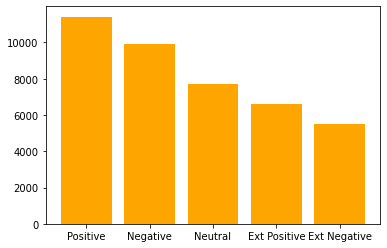

In [10]:
pos_val = 0
neg_val = 0
ntl_val = 0
exp_val = 0
exn_val = 0
for i in train_data['Sentiment']:
    if i == 'Positive':
        pos_val+=1
    elif i =='Extremely Positive':
        exp_val+=1
    elif i =='Extremely Negative':
        exn_val+=1
    elif i =='Negative':
        neg_val+=1
    else:
        ntl_val+=1
data = [pos_val,neg_val,ntl_val,exp_val,exn_val]
plt.bar(['Positive','Negative','Neutral','Ext Positive','Ext Negative'],data,color='orange')
plt.show()

Dropping down the unwanted column for the training the data

In [11]:
train_data = train_data.drop(['ScreenName','Location','TweetAt','UserName'],axis=1)

In [12]:
train_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [13]:
train_data.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [14]:
test_data = test_data.drop(['ScreenName','Location','TweetAt'],axis=1)

In [15]:
test_data.isnull().sum()

UserName         0
OriginalTweet    0
dtype: int64

Preprocess the data and Remove the mentions , links etc

In [17]:
# load stop words
import nltk
nltk.download('stopwords')
stop_word = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
# Preprocessing the data
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def lower(text):
    low_text= text.lower()
    return low_text

def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove

def remove_punct(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct

def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text

def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text

def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove

def remove_stopwords(text):
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])
    return text

train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(lambda x:remove_urls(x))
train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(lambda x:remove_html(x))
train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(lambda x:lower(x))
train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(lambda x:remove_num(x))
train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(lambda x:remove_mention(x))
train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(lambda x:remove_hash(x))
train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(lambda x:remove_space(x))
train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(lambda x:remove_stopwords(x))

In [19]:
train_data.head(20)

,OriginalTweet,Sentiment
0,,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia: woolworths give elderly...,Positive
3,"food stock one empty... please, panic, enough ...",Positive
4,"me, ready go supermarket outbreak. i'm paranoi...",Extremely Negative
5,news regionâs first confirmed covid- case cam...,Positive
6,cashier grocery store sharing insights prove c...,Positive
7,supermarket today. buy toilet paper.,Neutral
8,due covid- retail store classroom atlanta open...,Positive
9,"corona prevention,we stop buy things cash use ...",Negative


Preprocessing the test data

In [20]:
test_data['OriginalTweet'] = test_data['OriginalTweet'].apply(lambda x:remove_urls(x))
test_data['OriginalTweet'] = test_data['OriginalTweet'].apply(lambda x:remove_html(x))
test_data['OriginalTweet'] = test_data['OriginalTweet'].apply(lambda x:lower(x))
test_data['OriginalTweet'] = test_data['OriginalTweet'].apply(lambda x:remove_num(x))
test_data['OriginalTweet'] = test_data['OriginalTweet'].apply(lambda x:remove_mention(x))
test_data['OriginalTweet'] = test_data['OriginalTweet'].apply(lambda x:remove_hash(x))
test_data['OriginalTweet'] = test_data['OriginalTweet'].apply(lambda x:remove_space(x))
test_data['OriginalTweet'] = test_data['OriginalTweet'].apply(lambda x:remove_stopwords(x))

In [21]:
test_data.head(20)

,UserName,OriginalTweet
0,1,trending: new yorkers encounter empty supermar...
1,2,"find hand sanitizer fred meyer, turned . $. pa..."
2,3,find protect loved ones . ?
3,4,buying hits city anxious shoppers stock food&a...
4,5,one week everyone buying baby milk powder next...
5,6,remember last time paid $. gallon regular gas ...
6,7,voting age = hand sanitizer ?
7,8,"""we can?t stop without protecting . prices sur..."
8,9,hi twitter! pharmacist. sell hand sanitizer li...
9,10,anyone supermarket last days? went normal shop...


Encoding the target value since it is a Categorical data

In [22]:
le = LabelEncoder() 
train_data['Sentiment'] = le.fit_transform(train_data['Sentiment'])
train_data.head(10)

,OriginalTweet,Sentiment
0,,3
1,advice talk neighbours family exchange phone n...,4
2,coronavirus australia: woolworths give elderly...,4
3,"food stock one empty... please, panic, enough ...",4
4,"me, ready go supermarket outbreak. i'm paranoi...",0
5,news regionâs first confirmed covid- case cam...,4
6,cashier grocery store sharing insights prove c...,4
7,supermarket today. buy toilet paper.,3
8,due covid- retail store classroom atlanta open...,4
9,"corona prevention,we stop buy things cash use ...",2


In [23]:
train_data['Sentiment'].value_counts()

4    11422
2     9917
3     7713
1     6624
0     5481
Name: Sentiment, dtype: int64

In [24]:
output_dict = {4:"Positive",2:"Negative",3:"Neutral",1:"Extremely Positive",0:"Extremely Negative"}

Vectorization of the Words for mutliclass classification

In [25]:
max_len = np.max(train_data['OriginalTweet'].apply(lambda x :len(x)))
max_dim =16
print(max_len)

280


Model Creation and Pre-processing

In [27]:
tokenizer = Tokenizer()
X_new = train_data['OriginalTweet']
Y_new = train_data['Sentiment']
Y_new = to_categorical(Y_new,5)
tokenizer.fit_on_texts(X_new)
vocab_length = len(tokenizer.word_index) + 1

X_new = tokenizer.texts_to_sequences(X_new)

X_new = pad_sequences(X_new, maxlen=max_len, padding='post')

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, max_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new,test_size=0.20)

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 280, 16)           574800    
_________________________________________________________________
bidirectional (Bidirectional (None, 280, 512)          420864    
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 1,028,821
Trainable params: 1,028,821
Non-trainable params: 0
______________________________________________

In [30]:
history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10
1029/1029 [==============================] - 79s 46ms/step - loss: 1.5707 - accuracy: 0.2741 - val_loss: 1.2656 - val_accuracy: 0.4397
Epoch 2/10
1029/1029 [==============================] - 47s 45ms/step - loss: 1.0837 - accuracy: 0.5489 - val_loss: 0.7540 - val_accuracy: 0.7358
Epoch 3/10
1029/1029 [==============================] - 47s 45ms/step - loss: 0.6620 - accuracy: 0.7801 - val_loss: 0.6708 - val_accuracy: 0.7699
Epoch 4/10
1029/1029 [==============================] - 47s 45ms/step - loss: 0.4767 - accuracy: 0.8552 - val_loss: 0.7031 - val_accuracy: 0.7755
Epoch 5/10
1029/1029 [==============================] - 46s 45ms/step - loss: 0.3944 - accuracy: 0.8862 - val_loss: 0.7630 - val_accuracy: 0.7636
Epoch 6/10
1029/1029 [==============================] - 46s 45ms/step - loss: 0.3130 - accuracy: 0.9134 - val_loss: 0.8250 - val_accuracy: 0.7567
Epoch 7/10
1029/1029 [==============================] - 47s 46ms/step - loss: 0.2618 - accuracy: 0.9282 - val_loss: 0.9641 -

Evaluating the Model Metrics

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
print(f"Accuracy on training data is:- {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")

print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")

Y_pred = model.predict(X_test)

Accuracy on training data is:- 95.36218643188477 %
Loss 17.02379584312439
Accuracy on validation data is:- 73.57871532440186 %
Loss 110.077965259552


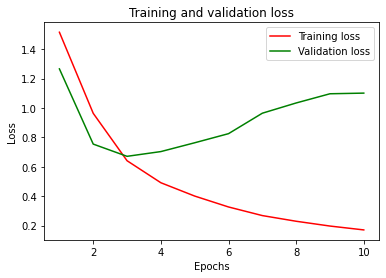

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Exploring the Other Trivial ML models

In [34]:
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop_word)
X = train_data['OriginalTweet']
Y = train_data['Sentiment']
X = vectorizer.fit_transform(X)
vocab_length = X.shape[1]


In [35]:
print(X.shape)
print(Y.shape)
print(vocab_length)

(41157, 33560)
(41157,)
33560


In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)


In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32925, 33560)
(8232, 33560)
(32925,)
(8232,)


Model Creation

In [66]:
accuracy = []
x = []

accuracy.append(history.history['val_accuracy'][-1])
x.append("GRU Model")

In [49]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion="gini")

In [50]:
out = model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 448,   42,  365,   76,  129],
       [  35,  670,  102,   43,  498],
       [ 256,   79,  991,  263,  414],
       [  31,   30,  163, 1184,  125],
       [  90,  309,  386,  212, 1291]])

In [67]:
dt_prediction = model_DT.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt_prediction)
print("Training accuracy Score    : ",model_DT.score(x_train,y_train))
print("Validation accuracy Score : ",dt_accuracy )
print(classification_report(y_test, y_pred))

accuracy.append(dt_accuracy)
x.append("Decision Tree")

Training accuracy Score    :  0.9997570235383447
Validation accuracy Score :  0.5568513119533528
              precision    recall  f1-score   support

           0       0.52      0.42      0.47      1060
           1       0.59      0.50      0.54      1348
           2       0.49      0.49      0.49      2003
           3       0.67      0.77      0.72      1533
           4       0.53      0.56      0.54      2288

    accuracy                           0.56      8232
   macro avg       0.56      0.55      0.55      8232
weighted avg       0.55      0.56      0.55      8232



In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(x_train,y_train)

rf_prediction = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(x_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9998611545003298
Validation accuracy Score :  0.5698088759313249
              precision    recall  f1-score   support

           0       0.36      0.69      0.47       854
           1       0.34      0.71      0.46       943
           2       0.53      0.52      0.53      3049
           3       0.84      0.62      0.71      3144
           4       0.65      0.52      0.58      4358

    accuracy                           0.57     12348
   macro avg       0.54      0.61      0.55     12348
weighted avg       0.63      0.57      0.58     12348



In [68]:
accuracy.append(rf_accuracy)
x.append("Random Forest")

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(x_train,y_train)

sgd_prediction = sgd_clf.predict(x_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(x_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.8920823353813044
Validation accuracy Score :  0.5864107547781017
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      1742
           1       0.72      0.65      0.68      2176
           2       0.44      0.52      0.47      2490
           3       0.79      0.60      0.69      3027
           4       0.47      0.56      0.51      2913

    accuracy                           0.59     12348
   macro avg       0.61      0.59      0.60     12348
weighted avg       0.61      0.59      0.59     12348



In [69]:
accuracy.append(sgd_accuracy)
x.append("Gradient Descent")

In [43]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(x_train,y_train)

NB_prediction = naiveByes_clf.predict(x_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(x_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.734319136380992
Validation accuracy Score :  0.47303206997084546
              precision    recall  f1-score   support

           0       0.36      0.58      0.44      1000
           1       0.45      0.56      0.50      1595
           2       0.51      0.42      0.46      3602
           3       0.32      0.69      0.44      1073
           4       0.61      0.42      0.50      5078

    accuracy                           0.47     12348
   macro avg       0.45      0.53      0.47     12348
weighted avg       0.51      0.47      0.48     12348



In [70]:
accuracy.append(NB_accuracy)
x.append("Naive Bayes")

In [44]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(x_train, y_train)

xgb_prediction = xgboost_clf.predict(x_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(x_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.4965809295706203
Validation accuracy Score :  0.46849692257855524
              precision    recall  f1-score   support

           0       0.35      0.58      0.43       967
           1       0.39      0.68      0.49      1121
           2       0.38      0.43      0.41      2634
           3       0.62      0.43      0.51      3323
           4       0.54      0.44      0.48      4303

    accuracy                           0.47     12348
   macro avg       0.46      0.51      0.47     12348
weighted avg       0.50      0.47      0.47     12348



In [71]:
accuracy.append(xgb_accuracy)
x.append("Xg Boost")

In [45]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)

svc_prediction = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(x_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.915963761324586
Validation accuracy Score :  0.6054421768707483
              precision    recall  f1-score   support

           0       0.44      0.70      0.54      1032
           1       0.53      0.78      0.63      1340
           2       0.54      0.53      0.54      3051
           3       0.75      0.65      0.70      2627
           4       0.69      0.55      0.61      4298

    accuracy                           0.61     12348
   macro avg       0.59      0.64      0.60     12348
weighted avg       0.63      0.61      0.61     12348



In [72]:
accuracy.append(svc_accuracy)
x.append("SVM")

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

logreg_prediction = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(x_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9478982262487418
Validation accuracy Score :  0.6246355685131195
              precision    recall  f1-score   support

           0       0.56      0.66      0.61      1364
           1       0.64      0.72      0.68      1767
           2       0.56      0.56      0.56      2966
           3       0.77      0.65      0.70      2729
           4       0.61      0.60      0.60      3522

    accuracy                           0.62     12348
   macro avg       0.63      0.64      0.63     12348
weighted avg       0.63      0.62      0.63     12348



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
accuracy.append(logreg_accuracy)
x.append("Regression")

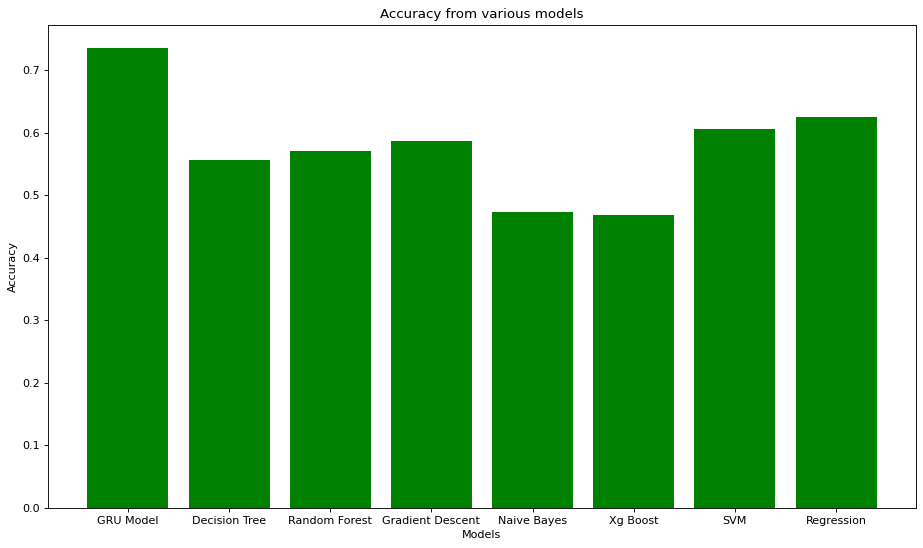

In [83]:
from matplotlib.pyplot import figure

figure(figsize=(14, 8), dpi=80)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, accuracy, color='green')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy from various models")

plt.xticks(x_pos, x)
plt.show()

In [84]:
# From the above graph it is clearly evident that our GRU model is best 

# We will use this model for our test set 

model.save("GRU_model.h5")


In [85]:
tokenizer = Tokenizer()
test = test_data['OriginalTweet']
tokenizer.fit_on_texts(test)
test = tokenizer.texts_to_sequences(test)
test = pad_sequences(test, maxlen=max_len, padding='post')
test.shape

(3798, 280)

Predicting the output for the test data

In [97]:
output = model.predict_classes(test)
print(output)
freq = {0:0,1:0,2:0,3:0,4:0}
for i in output:
  freq[i]+=1
for key in output_dict.keys():
  print(output_dict[key],freq[key])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[4 1 2 ... 4 4 2]
Positive 1154
Negative 1062
Neutral 643
Extremely Positive 568
Extremely Negative 371


In [101]:
rows=[]
k=0
for i in test_data['UserName']:
  temp=[]
  temp.append(i)
  temp.append(output_dict[output[k]])
  k+=1
  rows.append(temp)

for i in range(25):
  print(rows[i])
print(len(rows))

[1, 'Positive']
[2, 'Extremely Positive']
[3, 'Negative']
[4, 'Negative']
[5, 'Extremely Positive']
[6, 'Extremely Positive']
[7, 'Negative']
[8, 'Positive']
[9, 'Extremely Positive']
[10, 'Extremely Positive']
[11, 'Negative']
[12, 'Positive']
[13, 'Positive']
[14, 'Positive']
[15, 'Extremely Negative']
[16, 'Negative']
[17, 'Positive']
[18, 'Positive']
[19, 'Negative']
[20, 'Extremely Positive']
[21, 'Neutral']
[22, 'Negative']
[23, 'Extremely Positive']
[24, 'Extremely Positive']
[25, 'Extremely Negative']
3798


Writing the output into CSV

In [103]:
import csv
fields = ['UserName','Sentiment']
filename = "Sreedhar_V_Tweet_Sentiment_output.csv"

with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields)   
    csvwriter.writerows(rows)